In [1]:
import os, subprocess
import json
import uproot3
import awkward as ak
import numpy as np
from coffea import processor, util, hist
import pickle

import matplotlib
import matplotlib.pyplot as plt
#matplotlib.rcParams.update({'font.size': 18})

import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.8/site-packages/coffea/util.py:154: FutureWarning: In coffea version v0.8.0 (target date: 31 Dec 2022), this will be an error.
(Set coffea.deprecations_as_errors = True to get a stack trace now.)
ImportError: coffea.hist is deprecated
  warnings.warn(message, FutureWarning)


In [2]:
def get_scale_unc(year, p):

    vbf = pickle.load(open(str(year)+'/templates.pkl','rb')).integrate('region','signal-vbf').integrate('mjj',overflow='allnan').sum('genflavor','pt1').integrate('process',p)
    
    print(vbf.identifiers('systematic'))
    
    fig, ax = plt.subplots(1,1,figsize=(5,5))
    
    hist.plot1d(vbf.integrate('systematic','scalevar_7ptUp').integrate('ddb1',int_range=slice(0,0.64)))
    hist.plot1d(vbf.integrate('systematic','nominal').integrate('ddb1',int_range=slice(0,0.64)))
    hist.plot1d(vbf.integrate('systematic','scalevar_7ptDown').integrate('ddb1',int_range=slice(0,0.64)))

    plt.legend(title=year,frameon=False,labels=["Up","Nominal","Down"])
    

[<StringBin (JERDown) instance at 0x7f05a935d1f0>, <StringBin (JERUp) instance at 0x7f05a935d130>, <StringBin (JESDown) instance at 0x7f05a935d2b0>, <StringBin (JESUp) instance at 0x7f05a935d100>, <StringBin (L1PrefiringDown) instance at 0x7f05cc67fb50>, <StringBin (L1PrefiringUp) instance at 0x7f05cc67fb20>, <StringBin (UESDown) instance at 0x7f05a935d310>, <StringBin (UESUp) instance at 0x7f05a935d340>, <StringBin (btagSFbc_2016APVDown) instance at 0x7f05cc67fd00>, <StringBin (btagSFbc_2016APVUp) instance at 0x7f05cc67fa00>, <StringBin (btagSFbc_correlatedDown) instance at 0x7f05cc67fbb0>, <StringBin (btagSFbc_correlatedUp) instance at 0x7f05cc67f8e0>, <StringBin (btagSFlight_2016APVDown) instance at 0x7f05cc67fbe0>, <StringBin (btagSFlight_2016APVUp) instance at 0x7f05cc67f610>, <StringBin (btagSFlight_correlatedDown) instance at 0x7f05cc67f9a0>, <StringBin (btagSFlight_correlatedUp) instance at 0x7f05cc67fa90>, <StringBin (jet_triggerDown) instance at 0x7f05cc67f850>, <StringBin (j

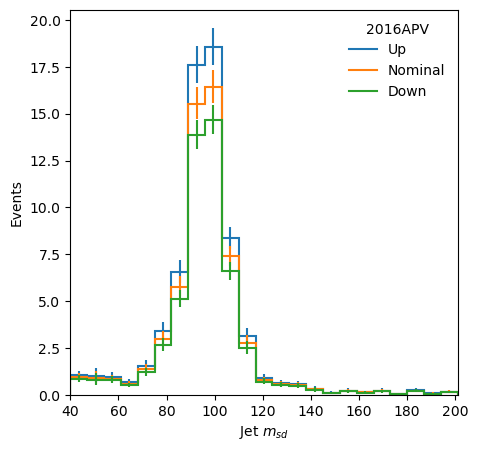

In [3]:
get_scale_unc('2016APV','EWKZ')

In [4]:
get_ps('2016')

NameError: name 'get_ps' is not defined

In [ ]:
get_ps('2017')

In [ ]:
get_ps('2018')

In [11]:
def get_ps_mjj(year, p):

    vbf = pickle.load(open(str(year)+'/templates.pkl','rb')).integrate('region','signal-vbf').sum('genflavor','pt1','msd1').integrate('process',p)
    
    fig, ax = plt.subplots(1,1,figsize=(5,5))
    
    hist.plot1d(vbf.integrate('systematic','scalevar_7ptUp').integrate('ddb1',int_range=slice(0,0.64)))
    hist.plot1d(vbf.integrate('systematic','nominal').integrate('ddb1',int_range=slice(0,0.64)))
    hist.plot1d(vbf.integrate('systematic','scalevar_7ptDown').integrate('ddb1',int_range=slice(0,0.64)))

    plt.legend(title=year,frameon=False,labels=["Nominal","Up","Down"])
     
    print(year + ' VBF category')
    
   
    print("Pythia nom")
    print(vbf.integrate('systematic','nominal').integrate('ddb1',int_range=slice(0,0.64)).values())
    print("Pythia up")
    print(vbf.integrate('systematic','scalevar_7ptUp').integrate('ddb1',int_range=slice(0,0.64)).values())
    print("Pythia down")
    print(vbf.integrate('systematic','scalevar_7ptDown').integrate('ddb1',int_range=slice(0,0.64)).values())


2016APV VBF category
Pythia nom
{(): array([32.7535501 , 25.91737675])}
Pythia up
{(): array([36.39884289, 29.95640672])}
Pythia down
{(): array([29.70402966, 22.69321992])}


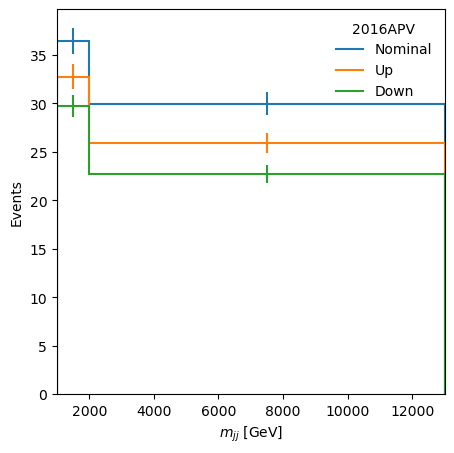

In [12]:
get_ps_mjj('2016APV','EWKZ')

In [ ]:
get_ps_mjj('2016')

In [ ]:
get_ps_mjj('2017')

In [ ]:
get_ps_mjj('2018')